In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("lung_disease_data.csv")

In [62]:
df.head()

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes


In [64]:
df.shape

(5200, 8)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [68]:
df.describe()

,Age,Lung Capacity,Hospital Visits
count,4900.000000,4900.000000,4900.000000
mean,54.449796,3.501865,7.528571
std,20.126882,1.461179,3.996401
min,20.000000,1.000000,1.000000
25%,37.000000,2.220000,4.000000
50%,54.000000,3.480000,8.000000
75%,72.000000,4.800000,11.000000
max,89.000000,6.000000,14.000000


In [70]:
df.isnull().sum()

Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

In [72]:
# Display unique values for categorical features
categorical_columns = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']
unique_values = {col: df[col].unique() for col in categorical_columns}

In [74]:
# Impute missing values
df['Lung Capacity'].fillna(df['Lung Capacity'].mean(), inplace=True)
df['Hospital Visits'].fillna(df['Hospital Visits'].median(), inplace=True)
df['Treatment Type'].fillna(df['Treatment Type'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Recovered'].fillna(df['Recovered'].mode()[0], inplace=True)

# Fill missing values for categorical columns with most frequent value
df['Smoking Status'].fillna(df['Smoking Status'].mode()[0], inplace=True)
df['Disease Type'].fillna(df['Disease Type'].mode()[0], inplace=True)

/var/folders/d8/chhc_wcj5b55fyp5bdlm51nh0000gn/T/ipykernel_47360/2483692434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lung Capacity'].fillna(df['Lung Capacity'].mean(), inplace=True)
/var/folders/d8/chhc_wcj5b55fyp5bdlm51nh0000gn/T/ipykernel_47360/2483692434.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [76]:
df.head()

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.490000,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,3.501865,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.950000,COPD,Medication,4.0,Yes
3,40.0,Female,Yes,3.501865,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.600000,COPD,Surgery,8.0,Yes


In [78]:
df.isnull().sum()

Age                0
Gender             0
Smoking Status     0
Lung Capacity      0
Disease Type       0
Treatment Type     0
Hospital Visits    0
Recovered          0
dtype: int64

## univariate

/var/folders/d8/chhc_wcj5b55fyp5bdlm51nh0000gn/T/ipykernel_47360/2414157690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease Type', data=df, palette='Set2')


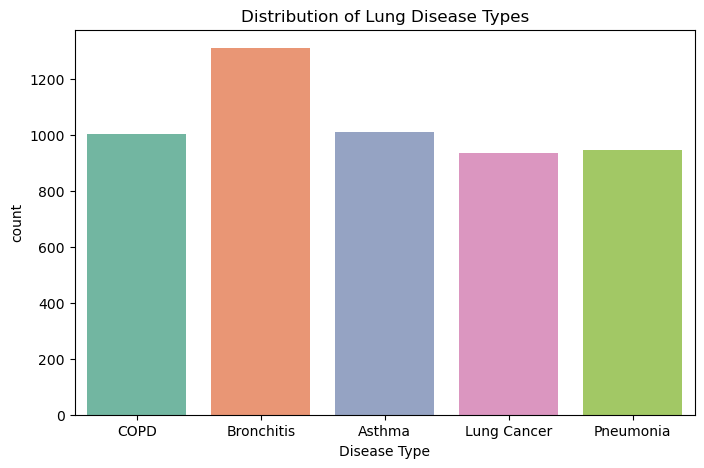

In [81]:

# 1. Bar plot - Distribution of Disease Types
plt.figure(figsize=(8, 5))
sns.countplot(x='Disease Type', data=df, palette='Set2')
plt.title('Distribution of Lung Disease Types')
plt.show()
# 1.Some diseases are more prevalent than others, indicating common lung conditions in the dataset.
# 2.Possible data imbalance, which could affect analysis if certain diseases are underrepresented.
# 3.Further breakdown by smoking status, gender, or treatment type could reveal deeper patterns

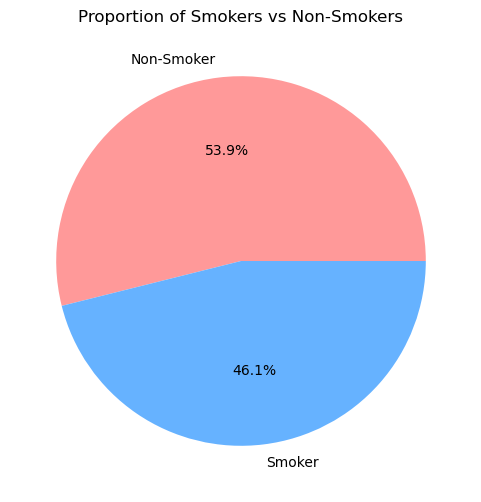

In [82]:
# 2. Pie chart - Proportion of Smokers vs Non-Smokers
plt.figure(figsize=(6, 6))
df['Smoking Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF9999','#66B2FF'], labels=['Non-Smoker', 'Smoker'])
plt.title('Proportion of Smokers vs Non-Smokers')
plt.ylabel('')
plt.show()
# 1.Non-smokers and smokers appear fairly balanced, but one group may dominate slightly.
# 2.Smoking could be a key factor influencing lung capacity and disease progression.
# 3.Further analysis can reveal how smoking affects hospital visits, recovery, and lung capacity.

/var/folders/d8/chhc_wcj5b55fyp5bdlm51nh0000gn/T/ipykernel_47360/1134079859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Lung Capacity', data=df, palette='coolwarm')


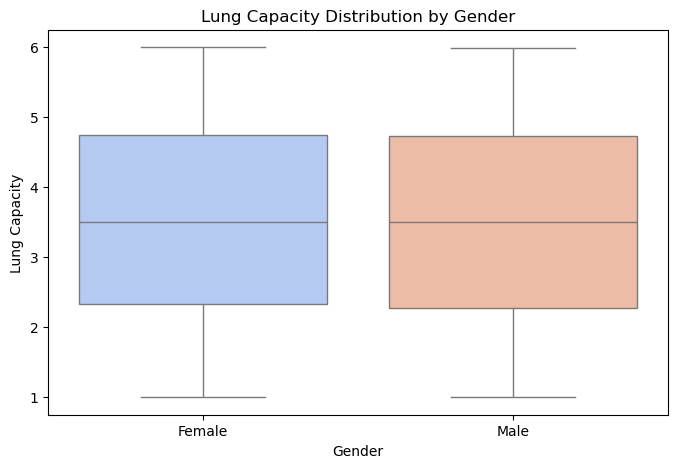

In [85]:
# 3. Box plot - Lung Capacity by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Lung Capacity', data=df, palette='coolwarm')
plt.title('Lung Capacity Distribution by Gender')
plt.show()
# 1.Median lung capacity appears similar for both genders, with slight variations.
# 2.Possible outliers in both groups, indicating some extreme cases.
# 3.Spread of data suggests variability, potentially influenced by other factors like smoking or disease type.

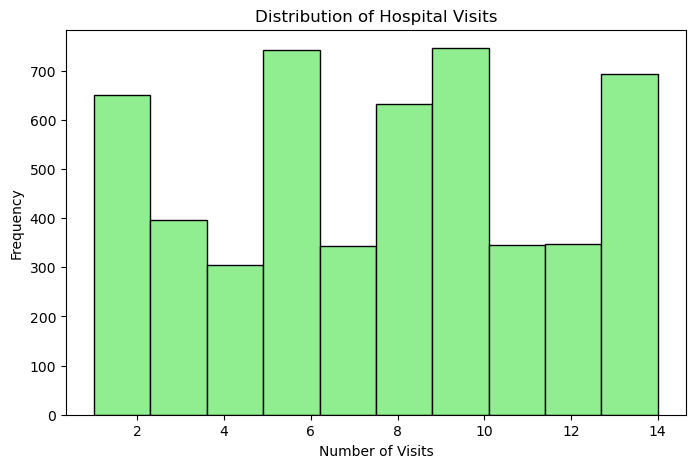

In [86]:
# 5. Histogram - Distribution of Hospital Visits
plt.figure(figsize=(8, 5))
plt.hist(df['Hospital Visits'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Hospital Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.show()
# 1.Most patients have a low to moderate number of visits, with fewer patients having very high visit counts.
# 2.Possible skewness: If the distribution is right-skewed, it suggests that a small group of patients require frequent hospital visits.
# 3.Missing values impact: Some data points might be missing, affecting the distribution.

## BIVARIATE

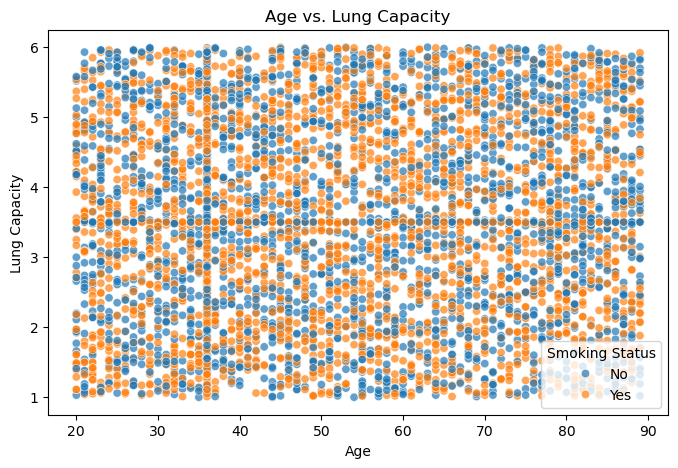

In [90]:
##Scatter Plot - Age vs. Lung Capacity
##Analyzing how lung capacity changes with age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Lung Capacity', data=df, hue='Smoking Status', alpha=0.7)
plt.title('Age vs. Lung Capacity')
plt.xlabel('Age')
plt.ylabel('Lung Capacity')
plt.show()
# 1.Lung capacity may decrease with age.
# 2.Smokers might have lower lung capacity than non-smokers

/var/folders/d8/chhc_wcj5b55fyp5bdlm51nh0000gn/T/ipykernel_47360/1626391503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease Type', y='Lung Capacity', data=df, palette='coolwarm')


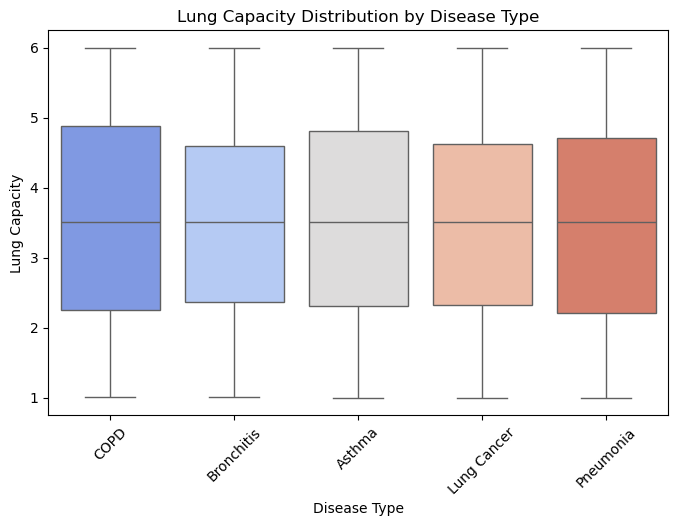

In [92]:
##Box Plot - Lung Capacity by Disease Type
##Comparing lung capacity across different diseases
plt.figure(figsize=(8, 5))
sns.boxplot(x='Disease Type', y='Lung Capacity', data=df, palette='coolwarm')
plt.title('Lung Capacity Distribution by Disease Type')
plt.xticks(rotation=45)
plt.show()
# 1.Different diseases show varying lung capacities.
# 2.Some diseases might have more severe impacts on lung function.

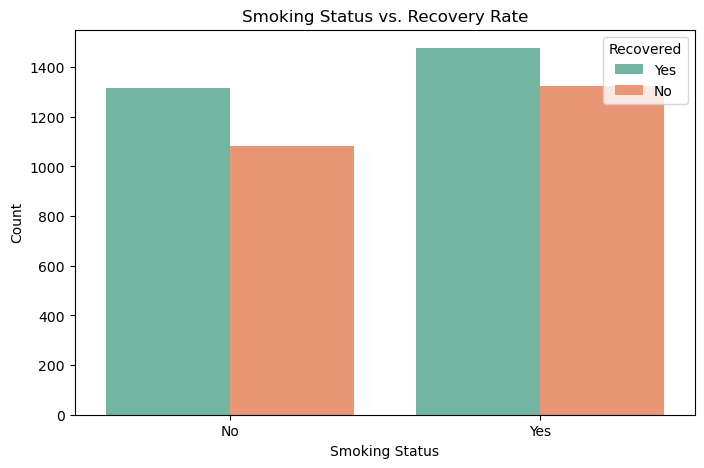

In [93]:
##Bar Plot - Smoking Status vs. Recovery Rate
##Checking how smoking impacts recovery rates
plt.figure(figsize=(8, 5))
sns.countplot(x='Smoking Status', hue='Recovered', data=df, palette='Set2')
plt.title('Smoking Status vs. Recovery Rate')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()
# 1.Non-smokers may have higher recovery rates than smokers.
# 2.Smoking could be a major factor affecting treatment success.

/var/folders/d8/chhc_wcj5b55fyp5bdlm51nh0000gn/T/ipykernel_47360/1104720838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Treatment Type', y='Hospital Visits', data=df, palette='pastel')


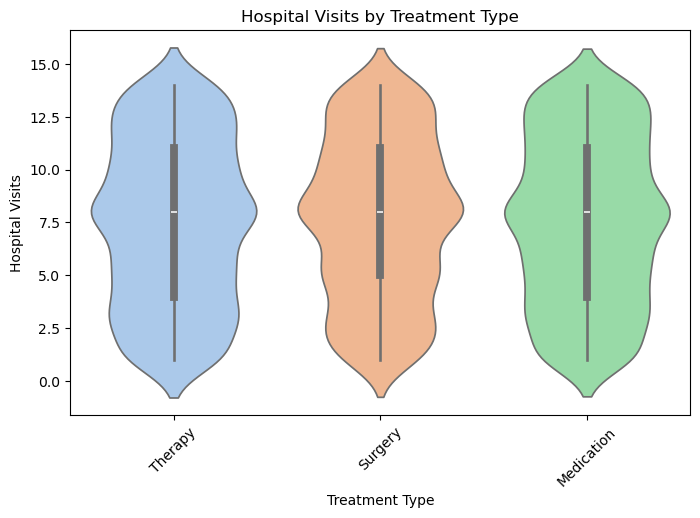

In [94]:
##Violin Plot - Hospital Visits by Treatment Type
##Understanding hospital visits across treatments
plt.figure(figsize=(8, 5))
sns.violinplot(x='Treatment Type', y='Hospital Visits', data=df, palette='pastel')
plt.title('Hospital Visits by Treatment Type')
plt.xticks(rotation=45)
plt.show()
# 1.Some treatments require more hospital visits than others.
# 2.High variability in hospital visits suggests different treatment effectiveness.

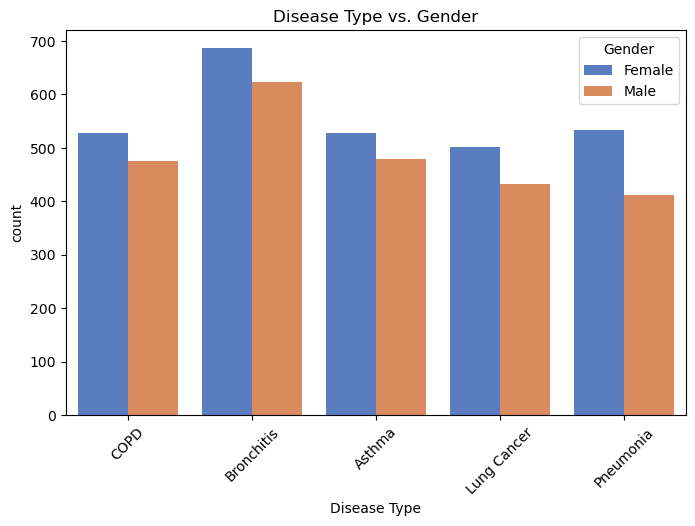

In [96]:
##Stacked Bar Plot - Disease Type vs. Gender
##Analyzing how lung diseases vary by gender.
plt.figure(figsize=(8, 5))
sns.countplot(x='Disease Type', hue='Gender', data=df, palette='muted')
plt.title('Disease Type vs. Gender')
plt.xticks(rotation=45)
plt.show()
# 1.Certain diseases might be more common in one gender.
# 2.Gender-based susceptibility to lung diseases can be explored further.

## MULTIVARIATE

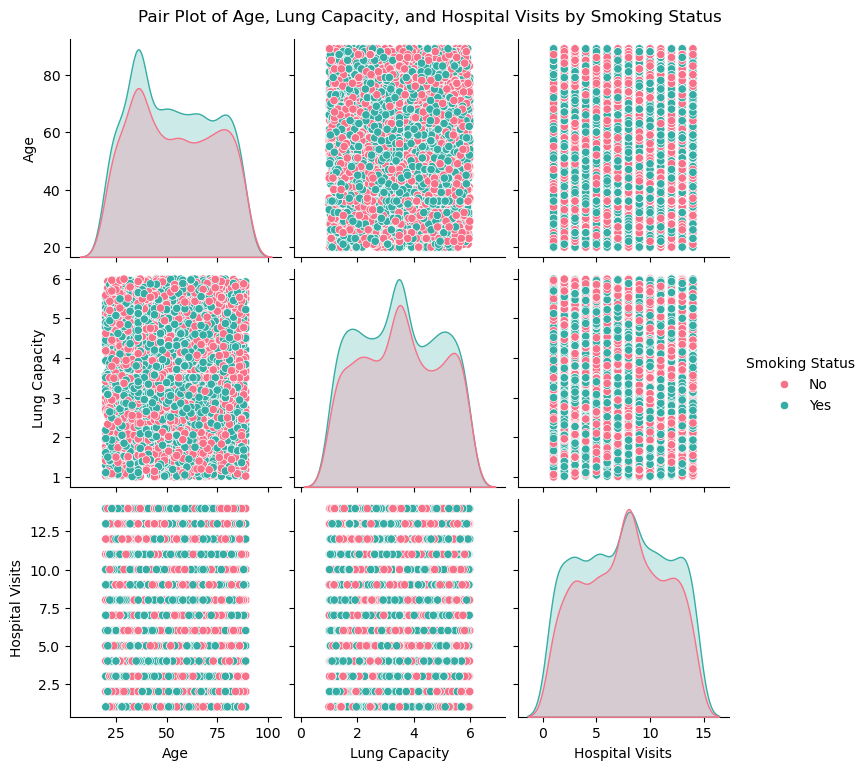

In [117]:
# Pair Plot - Age, Lung Capacity, and Hospital Visits (Grouped by Smoking Status)
# This helps visualize relationships between multiple numerical variables while highlighting smoking status.
sns.pairplot(df, vars=['Age', 'Lung Capacity', 'Hospital Visits'], hue='Smoking Status', palette='husl')
plt.suptitle('Pair Plot of Age, Lung Capacity, and Hospital Visits by Smoking Status', y=1.02)
plt.show()
# 1.Lung capacity may decline with age, especially for smokers.
# 2.Smokers may have lower lung capacity and more hospital visits compared to non-smokers.
# 3.No strong linear trend between hospital visits and lung capacity, indicating other influencing factors.

<Figure size 1000x600 with 0 Axes>

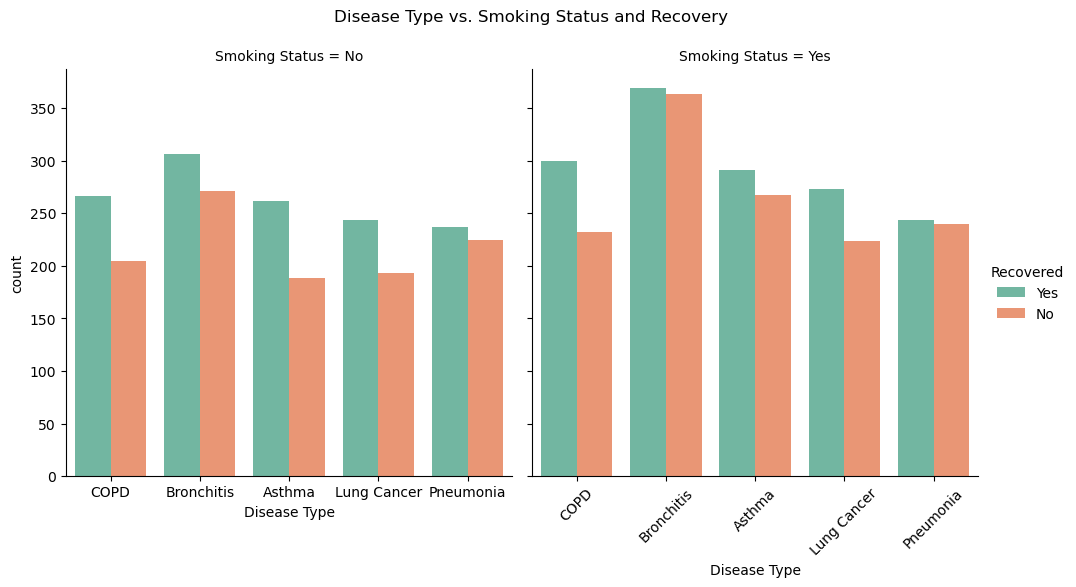

In [121]:
# Clustered Bar Plot - Disease Type vs. Smoking Status and Recovery
# Shows how smoking affects disease type and recovery rates
plt.figure(figsize=(10, 6))
sns.catplot(x='Disease Type', hue='Recovered', col='Smoking Status', data=df, kind='count', palette='Set2')
plt.xticks(rotation=45)
plt.suptitle('Disease Type vs. Smoking Status and Recovery', y=1.05)
plt.show()
# 1.Non-smokers generally have higher recovery rates across most disease types.
# 2.Smokers show lower recovery rates, suggesting smoking worsens disease outcomes.
# 3.Certain diseases might have a stronger link to smoking, with more smokers affected


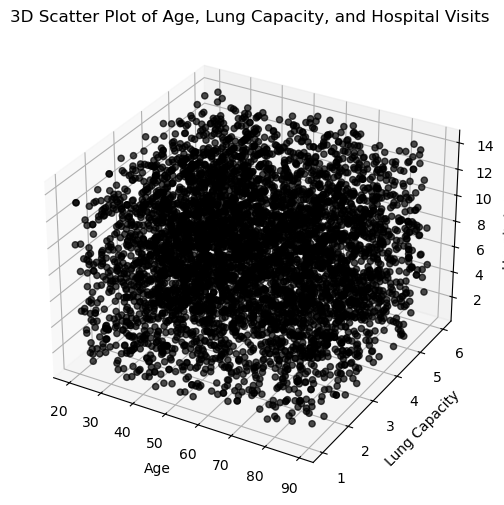

In [125]:
# 3D Scatter Plot - Age, Lung Capacity, and Hospital Visits (Colored by Disease Type)
# This helps visualize how these three numerical variables interact across different disease types.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on Disease Type
colors = {'Disease1': 'r', 'Disease2': 'g', 'Disease3': 'b', 'Disease4': 'y'}
df['Color'] = df['Disease Type'].map(colors)

ax.scatter(df['Age'], df['Lung Capacity'], df['Hospital Visits'], c=df['Color'], alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Lung Capacity')
ax.set_zlabel('Hospital Visits')
ax.set_title('3D Scatter Plot of Age, Lung Capacity, and Hospital Visits')

plt.show()
# 1.Lung capacity tends to decrease with age, particularly for certain disease types.
# 2.Patients with frequent hospital visits often have lower lung capacity, indicating more severe conditions.
# 3.Different disease types cluster in specific regions, suggesting distinct patterns in how diseases impact age, lung function, and hospital visits